In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)


product_reviews = pd.read_csv('ratings_Electronics.csv', names = ['user_id', 'prod_id', 'rating',  'time_stamp'], header = None)
product_reviews.head()

,user_id,prod_id,rating,time_stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [24]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
prod_id       object
rating        float64
time_stamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [0]:
product_reviews.shape

(77618, 4)

In [25]:
product_reviews['user_id'].isna().sum()
print(product_reviews['prod_id'].isna().sum())
print(product_reviews['rating'].isna().sum())
# No missing or null values

0
0


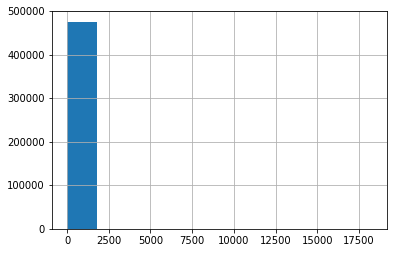

In [0]:
product_reviews.prod_id.value_counts().hist()

In [0]:
import seaborn as sns
sns.countplot(product_reviews['user_id'],label="Count")

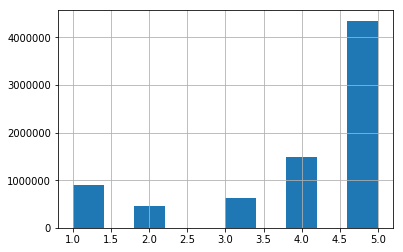

In [0]:
product_reviews.rating.hist()

In [27]:
# 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

# Dropping time stamp column as it has no contribution to the recommendation system
product_reviews = product_reviews.drop(["time_stamp"], axis=1)
product_reviews.head()

,user_id,prod_id,rating
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


In [0]:
# Consider only the users who have given 50 or more ratings


product_reviews = product_reviews[product_reviews['user_id'].isin(product_reviews['user_id'].value_counts()[product_reviews['user_id'].value_counts()>50].index)]


In [28]:
product_reviews.shape

(122171, 3)

In [0]:

(product_reviews['prod_id'].value_counts()>1).value_counts()
# Since more products received only 1 rating , considering products with only 1 rating also

False    30224
True     16931
Name: prod_id, dtype: int64

In [29]:
# 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

from sklearn.model_selection  import train_test_split

train_set, test_set = train_test_split(product_reviews,test_size = 0.3 , random_state=10)
print(train_set)
print(test_set)


                user_id     prod_id  rating
7473153  A1MFPAM9TTRTXN  B00DY3J8VM     5.0
7824069  A2NYK9KWFMJV4Y  B00L21HC7A     5.0
5648638  A3QJU4FEN8PQSZ  B0076U29LK     4.0
6784525  A3D5B2CBFNJB0K  B009YT6PPC     4.0
5682212  A1ZU55TM45Y2R8  B0079UAT0A     4.0
2507121  A1CPRP3VFJRS1R  B002AKKFPS     1.0
2946853  A33152QEGO2MZN  B002YC3K9A     5.0
33049    A3NHUQ33CFH3VM  B000031KIM     4.0
1246692  A19RW25Q6206I3  B000OFSN4G     5.0
4789452  A3F7USIDJBR8WU  B005AKCNBY     5.0
58654    A3Q4TYJVAM4IRM  B00004WCIC     3.0
4730741  A23GFTVIETX7DS  B0056C7SWK     3.0
5086862  A1CPRP3VFJRS1R  B005MR5GY6     4.0
1601637  A2WXURU33RBGQS  B0012GK3MQ     5.0
68854    A231WM2Z2JL0U3  B00004Z6PI     5.0
7786972  A2OS3TIVAKUAHG  B00IDYS0XY     4.0
1438793   AN81JUYW2SL24  B000VE4PNS     4.0
2728691  A2LCE1D0TW2XY0  B002N694A6     5.0
2245000  A197T2N6RU7K56  B001QTXL82     5.0
2567151   ADHA1W879JNT0  B002EL4M98     4.0
1623870  A2UWPPU5GZLMQZ  B0012Y541S     5.0
7645692  A11P105WVK5240  B00FNK8

In [0]:
# 4. Build Popularity Recommender model.

import turicreate
train_data = turicreate.SFrame(train_set)
test_data = turicreate.SFrame(test_set)


In [32]:
# 4. Build Popularity Recommender model.

popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='prod_id', target='rating')


Preparing data set.

Data has 85519 observations with 1466 users and 37396 items.

Data prepared in: 0.159565s

85519 observations to process; with 37396 unique items.

In [33]:
# 5. Build Collaborative Filtering model.
collab_fil_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='prod_id', target='rating', similarity_type='cosine')


Preparing data set.

Data has 85519 observations with 1466 users and 37396 items.

Data prepared in: 0.170192s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.821ms                        | 68         |

| 12.382ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 4.77s                               | 0                | 11              |

| 20.05s                              | 100              | 37396           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 21.123s

In [39]:
# 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
rmse_popularity_recomm = popularity_model.evaluate_rmse(test_data, target='rating')
print("Rmse for popularity recommendation system is:", rmse_popularity_recomm)

Rmse for popularity recommendation system is: {'rmse_by_user': Columns:
	user_id	str
	rmse	float
	count	int

Rows: 1466

Data:
+----------------+--------------------+-------+
|    user_id     |        rmse        | count |
+----------------+--------------------+-------+
| A19XPAWSWDRI3B | 0.8113694488022587 |   18  |
| AVTJEWTCJ3PBE  | 1.2416041197961118 |   13  |
| AM9APPMIE1BHZ  | 1.5258373649297166 |   15  |
| AXU3VKZE848IY  | 0.818006087338318  |   27  |
| A1NMM0RDRF6R84 | 1.1916321653608668 |   24  |
| ADKZOXAOV8EXD  | 1.3818343564946973 |   28  |
| A1P0JSFW184ZXJ | 1.1778015981467458 |   37  |
| A33YZNZIRA3H97 | 1.3671861833207315 |   42  |
| A32AFX2PUJ82HG | 1.3823130184375654 |   10  |
| AQR4HPVSOPS08  | 1.2426553274284002 |   15  |
+----------------+--------------------+-------+
[1466 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'rmse_by_item': Columns:
	prod_id	str
	rmse	floa

In [41]:
rmse_collab_recomm = collab_fil_model.evaluate_rmse(test_data, target='rating')
print("Rmse for colloborative recommendation system is:", rmse_collab_recomm)

Rmse for colloborative recommendation system is: {'rmse_by_user': Columns:
	user_id	str
	rmse	float
	count	int

Rows: 1466

Data:
+----------------+--------------------+-------+
|    user_id     |        rmse        | count |
+----------------+--------------------+-------+
| A19XPAWSWDRI3B |  4.48454134902457  |   18  |
| AVTJEWTCJ3PBE  | 4.6076858867298265 |   13  |
| AM9APPMIE1BHZ  | 4.113739293471599  |   15  |
| AXU3VKZE848IY  | 4.084711891796776  |   27  |
| A1NMM0RDRF6R84 | 4.385598671742448  |   24  |
| ADKZOXAOV8EXD  | 4.2443269808541855 |   28  |
| A1P0JSFW184ZXJ | 4.707411220898458  |   37  |
| A33YZNZIRA3H97 | 4.013856935040502  |   42  |
| A32AFX2PUJ82HG |  4.69041575982343  |   10  |
| AQR4HPVSOPS08  |  4.74692883171144  |   15  |
+----------------+--------------------+-------+
[1466 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'rmse_by_item': Columns:
	prod_id	str
	rmse	f

In [35]:
# 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
popularity_recomm = popularity_model.recommend(k=5)
print("!!!")
popularity_recomm


recommendations finished on 1000/1466 queries. users per second: 3948.4

!!!


user_id,prod_id,score,rank
A1MFPAM9TTRTXN,B0041OSAZ8,5.0,1
A1MFPAM9TTRTXN,B007SF8Z5M,5.0,2
A1MFPAM9TTRTXN,B0012Y541S,5.0,3
A1MFPAM9TTRTXN,B00004Z6PI,5.0,4
A1MFPAM9TTRTXN,B005AKCNBY,5.0,5
A2NYK9KWFMJV4Y,B0041OSAZ8,5.0,1
A2NYK9KWFMJV4Y,B007SF8Z5M,5.0,2
A2NYK9KWFMJV4Y,B0012Y541S,5.0,3
A2NYK9KWFMJV4Y,B00004Z6PI,5.0,4
A2NYK9KWFMJV4Y,B005AKCNBY,5.0,5


In [36]:
collab_fil_recomm = collab_fil_model.recommend(k=5)
collab_fil_recomm

recommendations finished on 1000/1466 queries. users per second: 2798.71

user_id,prod_id,score,rank
A1MFPAM9TTRTXN,B00A3YDNGQ,0.11545452806684706,1
A1MFPAM9TTRTXN,B00CZ7O3H2,0.11545452806684706,2
A1MFPAM9TTRTXN,B00BQ0RCQ8,0.11545452806684706,3
A1MFPAM9TTRTXN,B004H1V8PY,0.11545452806684706,4
A1MFPAM9TTRTXN,B000X5Z4RG,0.09804530276192559,5
A2NYK9KWFMJV4Y,B000B5LQCA,0.16999409953999964,1
A2NYK9KWFMJV4Y,B00744T1YG,0.16999409953999964,2
A2NYK9KWFMJV4Y,B000KH7MZ4,0.15942866720768237,3
A2NYK9KWFMJV4Y,B00492BTKK,0.15942866720768237,4
A2NYK9KWFMJV4Y,B0081ZDWZQ,0.15942866720768237,5


In [2]:
# 8. Summarise your insights.
print("Earlier we build recommendation systems using svd approach(For colloborative) and mean of highes rtings(popularity). Here we used a model to build the recommendation systems. The turicate library helped build a model on train data and tested it on test data. We could also give the user top 5 recommendation system directly using the library. Also as we have train and test data the accuracy score(RMSE) can also be calculated")


Earlier we build recommendation systems using svd approach(For colloborative) and mean of highes rtings(popularity). Here we used a model to build the recommendation systems. The turicate library helped build a model on train data and tested it on test data. We could also give the user top 5 recommendation system directly using the library. Also as we have train and test data the accuracy score(RMSE) can also be calculated
